In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [46]:
X, y = make_regression(
    n_samples=100, n_features=1, n_informative=1, noise=25, random_state=99
)

In [47]:
X[:2], y[:2]

(array([[0.639322  ],
        [0.26175546]]),
 array([40.22139979, -2.48188159]))

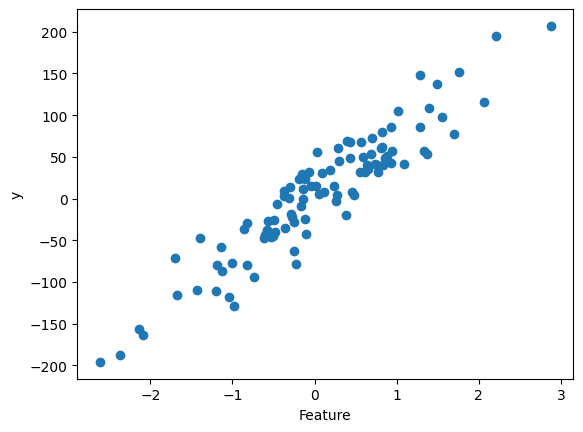

In [48]:
plt.scatter(X, y)
plt.xlabel("Feature")
plt.ylabel("y")
plt.show()

In [49]:
lr = LinearRegression()
lr.fit(X, y)

print("Coefficient:", lr.coef_[0])
print("Intercept:", lr.intercept_)

Coefficient: 71.03334134988812
Intercept: 1.6960620731013831


In [50]:
class GDRegressor:
    def __init__(self, learning_rate=0.01, epochs=10) -> None:
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = np.random.rand()
        self.b = np.random.rand()

    def fit(self, X, y):
        X = X.ravel()
        for _ in range(self.epochs):
            b_slope = -2 * np.sum(y - self.w * X - self.b)
            b_step_size = self.learning_rate * b_slope

            w_slope = -2 * np.sum(X * (y - self.w * X - self.b))
            w_step_size = self.learning_rate * w_slope

            self.b = self.b - b_step_size
            self.w = self.w - w_step_size

    def predict(self, X):
        return self.w * X.ravel() + self.b

In [51]:
gr = GDRegressor(learning_rate=0.001, epochs=1000)

In [52]:
gr.fit(X, y)
print("Weight:", gr.w)
print("Bias:", gr.b)

Weight: 71.03334134988808
Bias: 1.696062073101384


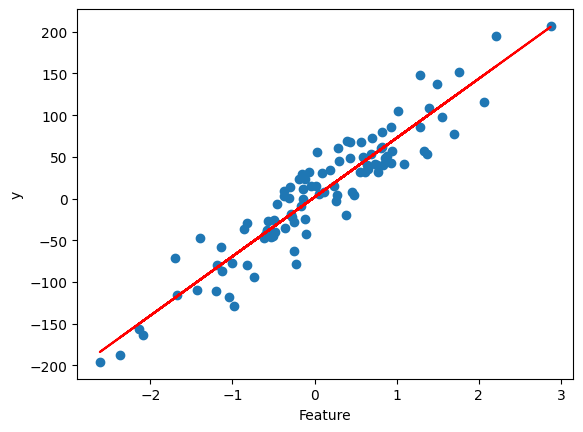

In [54]:
plt.scatter(X, y)
plt.plot(X, gr.predict(X), color="red")
plt.xlabel("Feature")
plt.ylabel("y")
plt.show()